**This code is inspired from Steve Brunton and Nathan Kutz's Databook for Fourier-Based Analysis found [here](https://github.com/dynamicslab/databook_python/blob/master/CH02/CH02_SEC06_4_Wavelet.ipynb)**. This particular code-block is simply getting the correct packages, and setting the Matplotlib settings correctly for use later.

In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

We are reading the image that we want to perform the transfrom on from the Images Folder. It converts the RGB image to grayscale by taking the mean of the different color-channel coefficients (RGB coefficients).

In [3]:
A = imread(r"C:\Users\abhi\Documents\Programs\Computer-Vision\Fourier Analysis\Images\lebronslam.jpg") #raw string
B = np.mean(A, -1); # Convert RGB to grayscale

We now compute a 2-level Wavelet Decomposition which, broadly speaking, will decompose the image using the Daubechies Filter (derived from the Daubechies Wavelet function) into high and low frequency components per what we said earlier.

In [4]:
n = 2 #level
w = 'db1'#Daubechies Wavelet
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

Note that unlike the DFT, which has an easily "normalizable" equivalent (1/sqrt(N)), the DWT isn't necessarily as easy to normalize. In this block of code, we go through the LL (Approximation) coefficients and normalize those first. Then, for every detail-level in the number of levels (there are 2 for this particular case), it will normalize the remaining coefficients. Note that *coeffs[detail_level+1]* is used because *coeffs[0]* is an array which only contains the approximation coefficients so it is normalized first. The remaining "coefficients" are actually 2d arrays which contain [HL, LH, HH] coefficients, which is why there is a second for-loop iterating over those coefficients and normalizing those.

In [5]:
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Displaying the results using the show method of PyPlots. The reason I picked this particular *vmin* and *vmax* was to make it easier to see what exactly the DWT was doing. You can adjust that, along with the *colormap* property in order to obtain differing color schemes as well (*Viridis* is a common one which will make the result look more blue-yellowey).

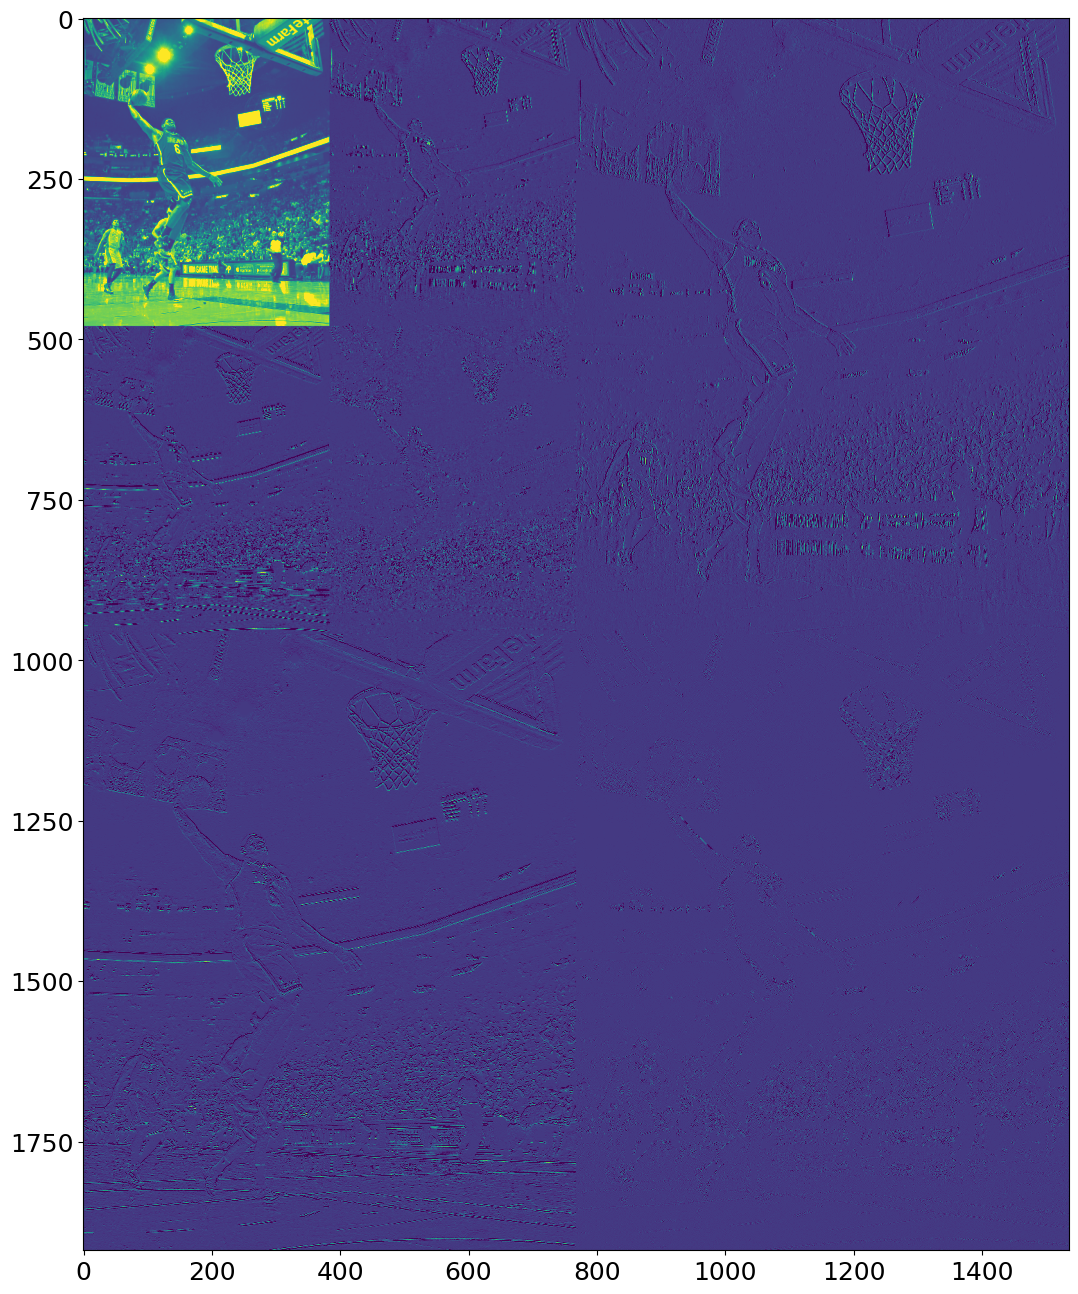

In [6]:
plt.imshow(arr,cmap='gray',vmin=-.15,vmax=.75) 
plt.show()

We can see the above and try and make sense of it noting that the top-left image represents the approximation coefficients (LL) -- note how it's **very** similar to the real image (to a naked eye it basically looks like a grayscale version of the same image). This should show how effective the DWT is at compressing images becuase we can simply take the first "n" coefficients to reconstruct the image and compare them side by side. The rest of the three remaining "parts" of each level of the image are the LH, HL, and HH coefficients. Note that if we were to compute an additional level of the transform, that would take the above result, shove it in the top-left 1/4th region, and output new LH, HL, and HH coefficients for the rest of the image.

Below is code to retrieve the initial image. Note that the DWT can be done with RGB images as well, but it's slightly more challenging to program becuase that involves treating each color channel independently and combining everything to get the image. This demonstration is mostly to show what the DWT does, so I didn't find it particularly useful to add 

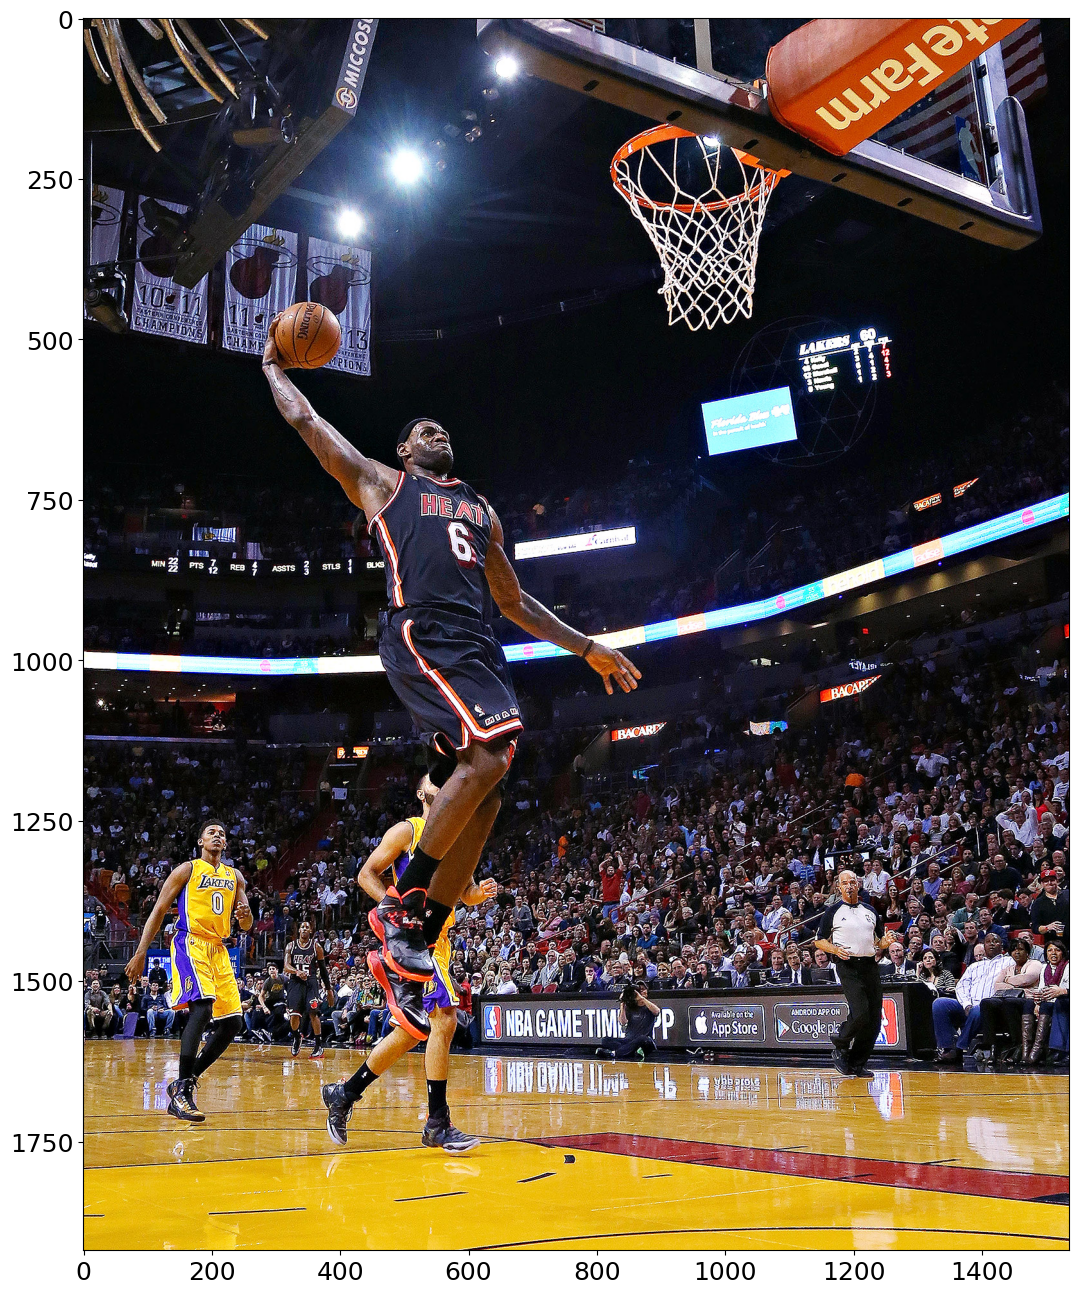

In [7]:
plt.imshow(A) 
plt.show()